In [75]:
import xml.etree.ElementTree as ET

def get_root(directory):
   root = ET.parse(directory).getroot()
   
   return root
feature_list = [
   'accent', 'breaks', 'phones', 
   'phonwords', 'syllables', 'turns',
   'phrase'
   ]
feat = 'phones'
tag_mapping = {
   'accent': ['accent', 'pointer'],
   'phones': ['ph', 'None'],
   'breaks': ['break', 'pointer'],
   'phonwords': ['phonword', 'child'],
   'syllables': ['syllable', 'child'],
   'turns': ['turn', 'child'],
   'phrase': ['phrase', 'child']
   }
rt = get_root(f'corpora/nxt_switchboard_ann/xml/{feat}/sw2018.A.{feat}.xml')
rt

<Element '{http://nite.sourceforge.net/}phoneme_stream' at 0x7fbb29f74e50>

In [81]:
tag_list = list()
for elem in rt:
    print(elem.tag.replace('{http://nite.sourceforge.net/}', ''))
    print(elem, elem.text)
    #print(elem.attrib)#.replace('{http://nite.sourceforge.net/}', ''))
    for child in elem:
        print(child.tag, child.attrib)
        print(child.text)
        print()
   
        


ph
<Element 'ph' at 0x7fbb29f83cc0> SIL
ph
<Element 'ph' at 0x7fbb29f831d0> hh
ph
<Element 'ph' at 0x7fbb29f83360> ax
ph
<Element 'ph' at 0x7fbb29f83400> l
ph
<Element 'ph' at 0x7fbb29f834a0> ow
ph
<Element 'ph' at 0x7fbb29f838b0> SIL
ph
<Element 'ph' at 0x7fbb29f83720> dh
ph
<Element 'ph' at 0x7fbb29f83e00> ih
ph
<Element 'ph' at 0x7fbb29f83c70> s
ph
<Element 'ph' at 0x7fbb29f754f0> ih
ph
<Element 'ph' at 0x7fbb29f75d10> z
ph
<Element 'ph' at 0x7fbb29f75ea0> l
ph
<Element 'ph' at 0x7fbb29f75130> ow
ph
<Element 'ph' at 0x7fbb29f75220> ih
ph
<Element 'ph' at 0x7fbb29f75540> s
ph
<Element 'ph' at 0x7fbb29f75770> SIL
ph
<Element 'ph' at 0x7fbb29f75860> SIL
ph
<Element 'ph' at 0x7fbb29f75b80> SIL
ph
<Element 'ph' at 0x7fbb29f75040> ae
ph
<Element 'ph' at 0x7fbb29f75680> n
ph
<Element 'ph' at 0x7fbb29f75cc0> d
ph
<Element 'ph' at 0x7fbb29f75a90> ah
ph
<Element 'ph' at 0x7fbb29f75360> m
ph
<Element 'ph' at 0x7fbb29f759a0> SIL
ph
<Element 'ph' at 0x7fbb29f751d0> ay
ph
<Element 'ph' at 0x7fbb2

In [86]:
from pathlib import Path
from tqdm import tqdm
attrib_dict = dict()
xml_dir = Path('corpora/nxt_switchboard_ann/xml/')
for directory in tqdm(list(xml_dir.glob('*'))):
    if not directory.name.endswith('.xml'):
        for file in directory.glob('*.xml'):
            root = get_root(file)
            iter_list = list()
            for elem in root.iter():
                iter_list.append(elem.tag.replace('{http://nite.sourceforge.net/}', ''))
            attrib_dict[directory.stem] = set(iter_list)
            break
attrib_dict   

  0%|          | 0/21 [00:00<?, ?it/s]

100%|██████████| 21/21 [00:00<00:00, 315.08it/s]


{'breaks': {'break', 'break_stream', 'pointer'},
 'corpus-resources': {'dialogue', 'dialogue_stream', 'pointer'},
 'terminals': {'pointer', 'punc', 'sil', 'terminal_stream', 'trace', 'word'},
 'phonwords': {'child', 'laughter', 'noise', 'phonword', 'phonword_stream'},
 'phrase': {'child', 'phrase', 'phrase_stream'},
 'prosnotes': {'prosnote', 'prosnote_stream'},
 'phones': {'ph', 'phoneme_stream'},
 'accent': {'accent', 'accent_stream', 'pointer'},
 'markable': {'markable', 'pointer', 'root'},
 'disfluency': {'child', 'disf_stream', 'disfluency', 'repair', 'reparandum'},
 'syllables': {'child', 'syllable', 'syllable_stream'},
 'movement': {'movement', 'movement_stream', 'pointer'},
 'kontrast': {'child', 'kontrast', 'root'},
 'coreference': {'link', 'pointer', 'root'},
 'active': {'active', 'pointer', 'root'},
 'dialAct': {'child', 'da', 'dialAct_stream'},
 'turns': {'child', 'turn', 'turn_stream'},
 'syntax': {'child', 'nt', 'parse', 'parse_stream'}}

set()

In [19]:
tag_list = list()
for elem in rt.iter():
    print(elem.tag.replace('{http://nite.sourceforge.net/}', ''))
    print(elem.attrib)#.replace('{http://nite.sourceforge.net/}', ''))
    
    for el in elem.attrib:
        print(el)

48

In [130]:
from pathlib import Path
from tqdm import tqdm
from pprint import pprint
import pandas as pd
import os
attrib_dict = dict()
xml_dir = Path('corpora/nxt_switchboard_ann/xml/')
save_dir = Path('corpora/nxt_switchboard_ann/csv')
for feat in tqdm(feature_list):
    directory = xml_dir / feat
    feat_list = list()
    for file in tqdm(list(directory.glob('*.xml'))):
        save_stem = ''.join(file.name.split('.')[:2])
        root = get_root(file)
        iter_list = list()
        for elem in root:
            if elem.tag == tag_mapping[feat][0]:
                feat_list.append(elem.attrib)
            for child in elem:
                tag = child.tag.replace('{http://nite.sourceforge.net/}', '')
                if tag == tag_mapping[feat][-1]:
                    #print(child)
                    feat_list[-1].update(child.attrib)               
        
        df = pd.DataFrame(feat_list)
        df.columns = [
            col.replace('{http://nite.sourceforge.net/}', '') for col in df.columns
            ]
        os.makedirs(save_dir / feat, exist_ok=True)
        save_path = save_dir / feat / save_stem
        df.to_csv(save_path.with_suffix('.csv'))


 29%|██▊       | 2/7 [03:07<07:49, 93.86s/it]


KeyboardInterrupt: 

In [132]:
accent_file_ids = [
        ''.join(file.split('.')[:2]) for file in os.listdir('corpora/nxt_switchboard_ann/xml/accent')
    ]
accent_file_ids

['sw4830B',
 'sw3227B',
 'sw4890A',
 'sw3682B',
 'sw2836A',
 'sw2370A',
 'sw2397A',
 'sw2145B',
 'sw4033B',
 'sw4150A',
 'sw4877A',
 'sw4019B',
 'sw2434B',
 'sw3171B',
 'sw2429A',
 'sw3876A',
 'sw3902B',
 'sw3161B',
 'sw2499B',
 'sw4090A',
 'sw4153A',
 'sw4325A',
 'sw2708A',
 'sw3156A',
 'sw2018A',
 'sw3925A',
 'sw3798B',
 'sw2290B',
 'sw4129B',
 'sw3838A',
 'sw3188A',
 'sw4346A',
 'sw2615A',
 'sw3349B',
 'sw3219B',
 'sw2628A',
 'sw4127A',
 'sw2593B',
 'sw2611A',
 'sw2593A',
 'sw4127B',
 'sw2611B',
 'sw3219A',
 'sw3349A',
 'sw2628B',
 'sw2615B',
 'sw3838B',
 'sw4129A',
 'sw2290A',
 'sw4346B',
 'sw3188B',
 'sw3925B',
 'sw2018B',
 'sw3798A',
 'sw3156B',
 'sw4325B',
 'sw2708B',
 'sw4153B',
 'sw3161A',
 'sw4090B',
 'sw2499A',
 'sw2429B',
 'sw3902A',
 'sw3876B',
 'sw4019A',
 'sw2434A',
 'sw4877B',
 'sw3171A',
 'sw4033A',
 'sw4150B',
 'sw2397B',
 'sw2145A',
 'sw2370B',
 'sw2836B',
 'sw3682A',
 'sw3227A',
 'sw4890B',
 'sw4830A',
 'sw4168B',
 'sw2305B',
 'sw4175A',
 'sw4329A',
 'sw3169B',
 'sw

In [144]:
csv_dir = Path('corpora/nxt_switchboard_ann/csv/accent')
length = 0
data = list()
ntype = 0
nstrength = list()
for file in csv_dir.glob('*.csv'):
    
    df = pd.read_csv(file)
    #pprint(df)
    data.extend(df.id.to_list())
    try:
        ntype += len(df['type'].dropna())
    except KeyError:
       nstrength.extend(df['strength'].dropna().to_list())
       continue 
    nstrength.extend(df['strength'].dropna().to_list())
 
print(f"total accents: {length}")
print(f"total strengths: {nstrength}")
print(f"total types: {ntype}")   
df = pd.DataFrame({'id': data, 'strength': nstrength})
df

total accents: 0
total strengths: ['full', 'full', 'full', 'full', 'weak', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'weak', 'full', 'full', 'full', 'weak', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'weak', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'weak', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'weak', 'weak', 'full', 'full', 'full', 'full', 'weak', 'full', 'full', 'weak', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'weak', 'full', 'full

,id,strength
0,sw3161.B.acc1.aw6,full
1,sw3161.B.acc2.aw9,full
2,sw3161.B.acc3.aw11,full
3,sw3161.B.acc4.aw17,full
4,sw3161.B.acc5.aw22,weak
...,...,...
34567,sw2499.B.acc298.aw1387,full
34568,sw2499.B.acc299.aw1388,full
34569,sw2499.B.acc300.aw1390,full
34570,sw2499.B.acc301.aw1397,full


In [145]:
!pip install seaborn
!pip install soundfile

  Using cached seaborn-0.13.0-py3-none-any.whl (294 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 1.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 1.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.0/68.0 kB 1.4 MB/s eta 0:00:00a 0:00:01
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 1.3 MB/s eta 0:00:0000:0100:01
  Using cached soundfile-0.12.1-py2.py3-none-macosx_10_9_x86_64.whl (1.2 MB)


In [150]:
import os
os.listdir('~/desktop/files/Stanford/Class files/Autumn 2023/TA Workshop')

FileNotFoundError: [Errno 2] No such file or directory: '~/desktop/files/Stanford/Class files/Autumn 2023/TA Workshop'

In [177]:
import soundfile as sf
waves = Path('corpora/nxt_switchboard_ann/wav')

for file in waves.glob('*.wav'):
    audio, sr = sf.read(file)
    try:
        assert sr == 16_000
    except AssertionError:
        print(sr)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 MB 12.2 MB/s eta 0:00:0000:0100:01
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 32.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 35.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 28.5 MB/s eta 0:00:0000:01
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 30.8 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.2/394.2 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 34.7 MB/s eta 0:00:0000:0100:01
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     ━━━━━━━━━━━━

2023-12-05 11:06:23.382711: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


138/138 [==============================] - 74s 532ms/step


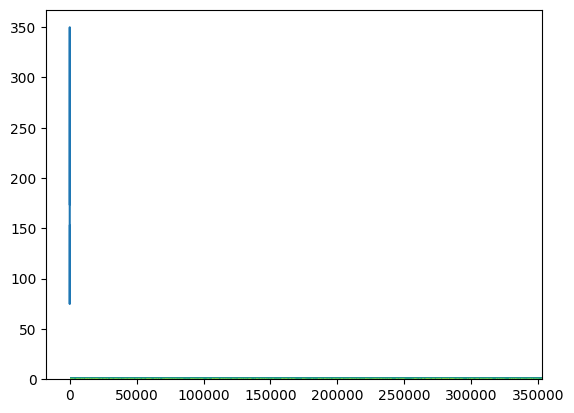

In [3]:

import crepe
from scipy.io import wavfile
import matplotlib.pyplot as plt
sr, audio = wavfile.read('data/switchboard/wav/sw2285B_t100.wav')
time, frequency, confidence, activation = crepe.predict(audio, sr, viterbi=True)

f = plt.specgram(audio)
plt.plot(time, frequency)

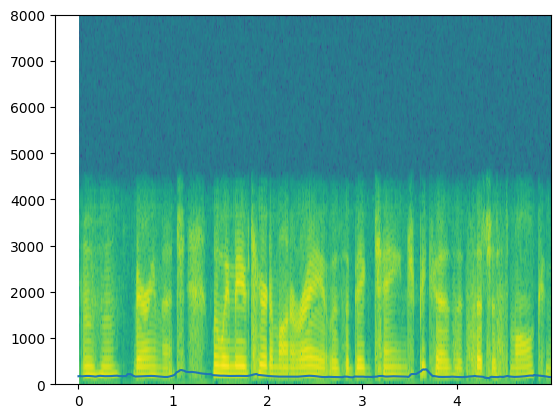

In [45]:
plt.specgram(audio[:80000], Fs=16000)
plt.plot(time[:500], frequency[:500])
plt.savefig('test.png', dpi=3000)

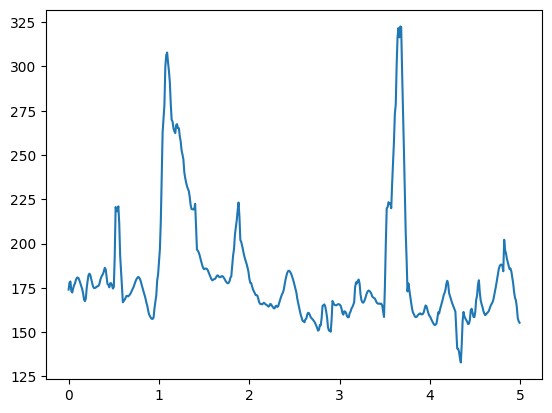

In [22]:
plt.plot(time[:500], frequency[:500])

In [20]:
len(time), max(time)

(4413, 44.12)

In [21]:
4413/44

100.29545454545455

In [43]:
5*16000

80000

In [41]:
audio.shape

(705972,)

In [60]:
import numpy as np
if time.shape[0] % 2 == 0:
    mean_time = np.mean(frequency.reshape(-1, 2), axis=1)
else:
    mean_time = np.concatenate([np.mean(frequency[:-1].reshape(-1, 2), axis=1).flatten(), frequency[-1]])
    
mean_time.shape[0],\
time[0::2].shape[0]

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 0 dimension(s)

In [70]:
np.append(np.mean(frequency[:-1].reshape(-1, 2), axis=1), frequency[-1]).shape

(2207,)

In [65]:
frequency[:8]

array([174.0179879 , 178.07099416, 178.5651068 , 173.13617981,
       172.36630475, 174.67161263, 176.46671911, 177.46515582])

In [67]:
(178+173)/2

175.5

In [74]:
16000 * 0.025
16000 * 0.02

320.0

In [88]:
#!pip install pinyin
import pinyin
import pandas as pd
import re

def get_tone_indices(x):
    m = re.search('\d+', x)
    if m is not None:
        return m.group()
    else:
        return x
df = pd.read_csv('corpora/global_timit_cmn/data/segmentation/SP01_001.words', sep=' ', names=['char', 'start', 'end'])

df['pinyin_txt'] = df.char.map(lambda x: pinyin.get(x, format='numerical'))
df['tone'] = df.pinyin_txt.map(lambda x: re.search('\d+', x).group() if re.search('\d+', x) is not None)
df

SyntaxError: invalid syntax (3759776223.py, line 8)